In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# load the dataset
df=pd.read_excel("Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [8]:
df.sample(15)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
3523,Jet Airways,27/03/2019,Delhi,Cochin,DEL → MAA → BOM → COK,05:10,04:25 28 Mar,23h 15m,2 stops,In-flight meal not included,9412
2726,IndiGo,21/05/2019,Delhi,Cochin,DEL → BOM → COK,20:25,01:30 22 May,5h 5m,1 stop,No info,5054
2906,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,16:00,19:00 22 May,27h,1 stop,No info,16079
5673,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,06:00,18:50,12h 50m,1 stop,No info,14629
7947,Air India,9/03/2019,Delhi,Cochin,DEL → LKO → BOM → COK,18:30,19:15 10 Mar,24h 45m,2 stops,No info,18211
9046,Air Asia,24/05/2019,Kolkata,Banglore,CCU → IXR → DEL → BLR,15:10,23:30,8h 20m,2 stops,No info,5192
7648,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,14:05,10:05 19 May,20h,1 stop,No info,14388
1823,Jet Airways,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,08:25,20:45,12h 20m,1 stop,In-flight meal not included,10844
583,Multiple carriers,18/05/2019,Delhi,Cochin,DEL → BOM → COK,06:00,19:00,13h,1 stop,No info,9794
2377,Vistara,6/03/2019,Mumbai,Hyderabad,BOM → DEL → HYD,08:45,09:25 07 Mar,24h 40m,1 stop,No info,12395


In [5]:
# ANALYSIS ON TRAIN DATASET
print("EDA ON DATASET")
print("#"*30)
print(df.info())

EDA ON DATASET
##############################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None


In [9]:
# Statistical view
print("EDA ON DATASET")
print("#"*30)
print(df.describe())

EDA ON DATASET
##############################
              Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


In [12]:
# convert Date_of_journey to date
df['Date'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Date
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24,2019-03-24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019-05-01,2019-05-01
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019-06-09,2019-06-09
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019-05-12,2019-05-12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019-03-01,2019-03-01


In [13]:
df['month'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.month
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Date,month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24,2019-03-24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019-05-01,2019-05-01,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019-06-09,2019-06-09,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019-05-12,2019-05-12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019-03-01,2019-03-01,3


In [19]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)
df.drop(['Journey_Month'],axis=1,inplace=True)

KeyError: "['Date_of_Journey'] not found in axis"

In [20]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019-05-01,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019-06-09,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019-05-12,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019-03-01,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,2019-04-09,4,9
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,2019-04-27,4,27
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,2019-04-27,4,27
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,2019-03-01,3,1


In [17]:
df['day'] = pd.to_datetime(df.Date, format='%d/%m/%Y').dt.day
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Date,month,day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24,2019-03-24,3,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019-05-01,2019-05-01,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019-06-09,2019-06-09,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019-05-12,2019-05-12,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019-03-01,2019-03-01,3,1


In [71]:
## Convert the Duration to numeric 
l=list(df['Duration'])
h=0
m=0
d=[]
for i in l:
    s=str(i).split(" ")
    if len(s)==2:
        if 'h' in s[0]:
            h=s[0].split('h')
        if 'm' in s[1]:
            m=s[1].split('m')
    if len(s)==1:
        if 'h' in s[0]:
            h=s[0].split('h')
        if 'm' in s[0]:
            m=s[0].split('m')
    d.append((int(h[0])*60+int(m[0])))
    h=[0]
    m=[0]
d

[170,
 445,
 1140,
 325,
 285,
 145,
 930,
 1265,
 1530,
 470,
 795,
 155,
 135,
 730,
 155,
 1595,
 270,
 1355,
 1380,
 1235,
 310,
 920,
 170,
 175,
 800,
 910,
 345,
 355,
 170,
 135,
 135,
 805,
 170,
 1320,
 330,
 625,
 315,
 150,
 375,
 715,
 665,
 510,
 1325,
 165,
 720,
 170,
 170,
 135,
 965,
 1195,
 195,
 1520,
 170,
 180,
 170,
 975,
 905,
 135,
 390,
 1505,
 745,
 1640,
 615,
 630,
 135,
 625,
 170,
 90,
 800,
 135,
 85,
 1590,
 440,
 810,
 300,
 165,
 170,
 90,
 1145,
 135,
 890,
 160,
 1330,
 575,
 600,
 1280,
 325,
 1125,
 740,
 1080,
 555,
 665,
 1050,
 800,
 155,
 145,
 160,
 180,
 85,
 995,
 740,
 735,
 450,
 1440,
 165,
 535,
 430,
 870,
 1820,
 1195,
 900,
 175,
 765,
 610,
 355,
 925,
 965,
 610,
 160,
 715,
 160,
 85,
 845,
 1215,
 145,
 1390,
 1090,
 960,
 170,
 140,
 480,
 1015,
 190,
 165,
 840,
 1430,
 1300,
 1275,
 165,
 650,
 480,
 495,
 325,
 515,
 710,
 1655,
 505,
 1255,
 290,
 490,
 140,
 1465,
 170,
 740,
 735,
 1415,
 995,
 170,
 1545,
 1570,
 1730,
 1

In [72]:
df.drop(['minutes'],axis=1,inplace=True)

In [74]:
df['minutes']=d
df[['Duration','minutes']].sample(20)

,Duration,minutes
6032,2h 20m,140
3286,15h 5m,905
600,7h 35m,455
4982,2h 40m,160
8461,15h 35m,935
5912,20h 25m,1225
9668,15h 20m,920
4709,2h 50m,170
7667,3h,180
6724,1h 30m,90


In [81]:
df['dep_time'] = pd.to_datetime(df.Dep_Time, format='%H:%M').dt.time
df.head(60)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,day,minutes,dep_time
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24,3,24,170,22:20:00
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019-05-01,5,1,445,05:50:00
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019-06-09,6,9,1140,09:25:00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019-05-12,5,12,325,18:05:00
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019-03-01,3,1,285,16:50:00
5,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,2019-06-24,6,24,145,09:00:00
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,2019-03-12,3,12,930,18:55:00
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,2019-03-01,3,1,1265,08:00:00
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,2019-03-12,3,12,1530,08:55:00
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625,2019-05-27,5,27,470,11:25:00


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Source           10683 non-null  object        
 2   Destination      10683 non-null  object        
 3   Route            10682 non-null  object        
 4   Dep_Time         10683 non-null  object        
 5   Arrival_Time     10683 non-null  object        
 6   Duration         10683 non-null  object        
 7   Total_Stops      10682 non-null  object        
 8   Additional_Info  10683 non-null  object        
 9   Price            10683 non-null  int64         
 10  Date             10683 non-null  datetime64[ns]
 11  month            10683 non-null  int64         
 12  day              10683 non-null  int64         
 13  minutes          10683 non-null  int64         
 14  dep_time         10683 non-null  objec

In [83]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,day,minutes,dep_time
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24,3,24,170,22:20:00
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019-05-01,5,1,445,05:50:00
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019-06-09,6,9,1140,09:25:00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019-05-12,5,12,325,18:05:00
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019-03-01,3,1,285,16:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,2019-04-09,4,9,150,19:55:00
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,2019-04-27,4,27,155,20:45:00
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,2019-04-27,4,27,180,08:20:00
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,2019-03-01,3,1,160,11:30:00


In [112]:
# get source destination for every airline with maximum price
airlines=df.groupby('Airline')
df_mp=pd.DataFrame(airlines["Price"].max())
df_mp
df1=df[["Airline","Source","Destination","Route","Price"]]
df2=pd.merge(df_mp,df1,left_on=["Airline","Price"],right_on=["Airline","Price"])
df2.drop_duplicates()

,Airline,Price,Source,Destination,Route
0,Air Asia,13774,Delhi,Cochin,DEL → BLR → COK
1,Air India,31945,Kolkata,Banglore,CCU → BLR
2,GoAir,22794,Delhi,Cochin,DEL → BOM → COK
3,IndiGo,22153,Banglore,New Delhi,BLR → BOM → DEL
4,Jet Airways,54826,Banglore,New Delhi,BLR → BOM → DEL
7,Jet Airways Business,79512,Banglore,New Delhi,BLR → BOM → DEL
8,Multiple carriers,36983,Delhi,Cochin,DEL → BOM → COK
9,Multiple carriers Premium economy,14629,Delhi,Cochin,DEL → BOM → COK
11,SpiceJet,23267,Banglore,New Delhi,BLR → PNQ → DEL
12,Trujet,4140,Mumbai,Hyderabad,BOM → NDC → HYD


In [119]:
airlines=df.groupby('Airline')
df_mp=pd.DataFrame(airlines["minutes"].max())
df_mp
df1=df[["Airline","Source","Destination","Route","minutes"]]
df2=pd.merge(df_mp,df1,left_on=["Airline","minutes"],right_on=["Airline","minutes"])
df2.drop_duplicates().reset_index()

,index,Airline,minutes,Source,Destination,Route
0,0,Air Asia,955,Kolkata,Banglore,CCU → DEL → BLR
1,11,Air India,2480,Kolkata,Banglore,CCU → GAU → DEL → BLR
2,12,GoAir,555,Kolkata,Banglore,CCU → BOM → BLR
3,13,IndiGo,985,Delhi,Cochin,DEL → HYD → MAA → COK
4,14,IndiGo,985,Delhi,Cochin,DEL → BOM → COK
5,20,Jet Airways,2860,Delhi,Cochin,DEL → AMD → BOM → COK
6,21,Jet Airways Business,500,Delhi,Cochin,DEL → ATQ → BOM → COK
7,23,Multiple carriers,935,Delhi,Cochin,DEL → BOM → COK
8,26,Multiple carriers Premium economy,900,Delhi,Cochin,DEL → BOM → COK
9,27,SpiceJet,520,Kolkata,Banglore,CCU → PNQ → BLR


In [121]:
df.value_counts("Source")

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
dtype: int64

In [123]:
df.value_counts("Destination")

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
dtype: int64

In [137]:
s=input("Enter the source")
d=input("Enter the destination")
m=int(input("Enter the Month of travel"))
f=np.where((df["Source"]==s) & (df["Destination"]==d) &(df["month"]==m))
df1=df.loc[f]
df1
df1[["Airline","Source","Destination","Route","Duration","Total_Stops","Price","Additional_Info"]].drop_duplicates().sample(15)

Enter the sourceBanglore
Enter the destinationNew Delhi
Enter the Month of travel3


,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Additional_Info
9739,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,13817,No info
7713,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,11h 25m,1 stop,26890,No info
7167,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,17h 35m,1 stop,13502,In-flight meal not included
1887,IndiGo,Banglore,New Delhi,BLR → DEL,2h 55m,non-stop,14306,No info
826,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,10h 25m,1 stop,26890,No info
6588,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,8h 50m,1 stop,26890,No info
575,Air India,Banglore,New Delhi,BLR → DEL,2h 45m,non-stop,4966,No info
2150,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,24h 15m,1 stop,17996,No info
2004,Jet Airways,Banglore,New Delhi,BLR → MAA → DEL,4h 40m,1 stop,12295,No info
1956,Air India,Banglore,New Delhi,BLR → HYD → VGA → DEL,29h 55m,2 stops,14887,No info


In [126]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,day,minutes,dep_time
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24,3,24,170,22:20:00
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019-05-01,5,1,445,05:50:00
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019-06-09,6,9,1140,09:25:00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019-05-12,5,12,325,18:05:00
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019-03-01,3,1,285,16:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,2019-04-09,4,9,150,19:55:00
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,2019-04-27,4,27,155,20:45:00
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,2019-04-27,4,27,180,08:20:00
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,2019-03-01,3,1,160,11:30:00


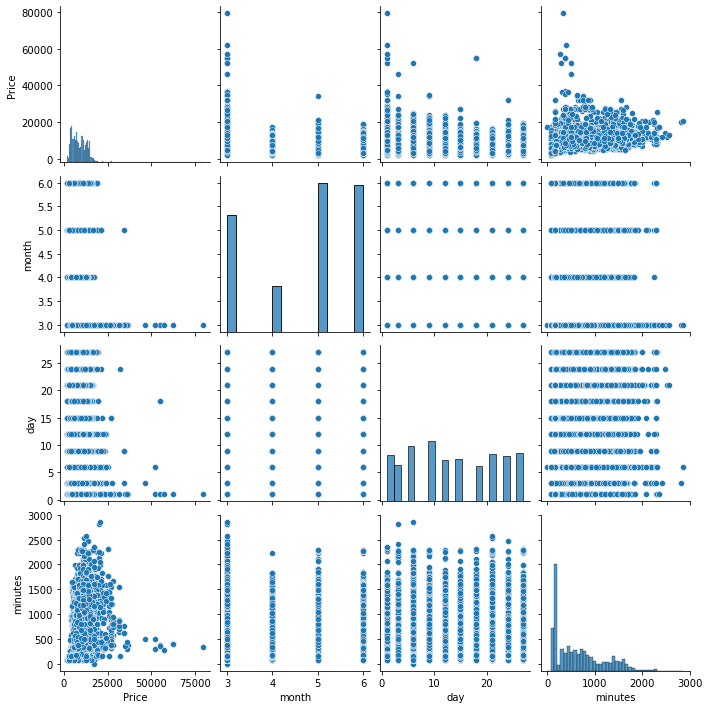

In [138]:
sns.pairplot(df)

C:\Users\91829\AppData\Local\Temp/ipykernel_5564/3531356715.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3=pd.DataFrame(df2["Airline","Price"].mean()).reset_index().round()


<AxesSubplot:xlabel='month', ylabel='Airline'>

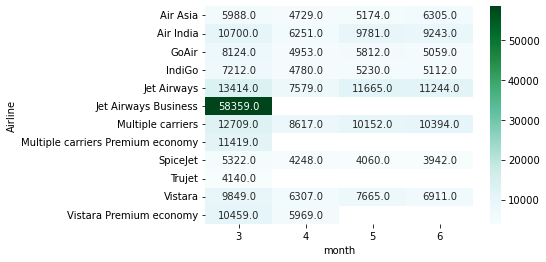

In [186]:
df1=df[["Airline","month","Price"]]
df2=df1.groupby(["Airline","month"])
df3=pd.DataFrame(df2["Airline","Price"].mean()).reset_index().round()
df4=df3.pivot("Airline","month","Price")
df4
sns.heatmap(df4,cmap="BuGn",annot=True, fmt='.1f')

In [188]:
df.value_counts("Total_Stops")

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
dtype: int64

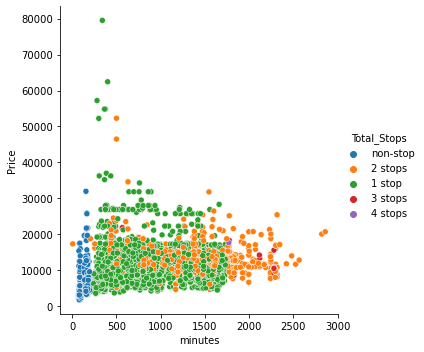

In [191]:
sns.relplot(data=df,x="minutes",y="Price",hue="Total_Stops")